In [16]:
# Required packages
# !pip install git+https://github.com/mkrphys/ipython-tikzmagic.git
%load_ext tikzmagic

#pip install jupyterlab_markup
# or
#conda install -c conda-forge jupyterlab-markup

from IPython.display import display, Latex

# !conda install sympy
from sympy import Matrix, latex, print_latex, init_printing
init_printing()

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


# Estimation Theory

or 

# Remote Sensing Data

## Bayes Theorem

An automatic speed control system detects speeding drivers (i.e. drivers, who are driving faster than the allowed speed limit). Speeding tickets are automatically sent to all detected speed limit violators.

- $H$: Driver is going to fast.
- $\bar{H}$: Driver keeps to the speed limit.
- $+$∶ Speed control system shows speeding driver.
- $-$: Speed control system does not show speeding driver.

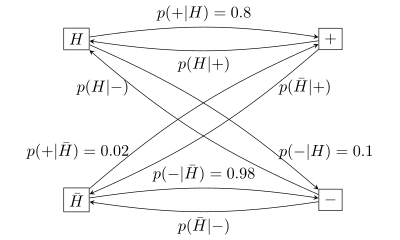

In [17]:
%%tikz -l positioning -f svg
  \tikzset{every node/.append style={node distance=3cm and 5cm}}
  \tikzset{mynode/.append style={rectangle, draw}}
  \tikzset{myarrow/.append style={-stealth, bend left=3mm}}
  \node[mynode] (H) {$H$};
  \node[rectangle, draw, right=of H] (plus) {$+$};
  \node[rectangle, draw, below=of H] (H_) {$\bar{H}$};
  \node[rectangle, draw] at (plus |- H_) (minus) {$-$};

  \draw (H)    edge[myarrow] node[above] {$p(+|H)=0.8$} (plus);
  \draw (plus) edge[myarrow] node[below] {$p(H|+)$} (H);

  \draw (H_)    edge[myarrow] node[above] {$p(-|\bar{H})=0.98$} (minus);
  \draw (minus) edge[myarrow] node[below] {$p(\bar{H}|-)$} (H_);

  \draw (H)    edge[myarrow] node[right, pos=0.8] {$p(-|H)=0.1$} (minus);
  \draw (minus) edge[myarrow] node[left, pos=0.8] {$p(H|-)$} (H);

  \draw (H_)    edge[myarrow] node[left, pos=0.2] {$p(+|\bar{H})=0.02$} (plus);
  \draw (plus) edge[myarrow] node[right, pos=0.2] {$p(\bar{H}|+)$} (H_);

Mr. Smith received a ticket, but claims that he did not violate the speed limit. What is the probability that he did not drive too fast, although the system detected him speeding?
$$
\begin{align}
p(H|+) &= \frac{p(+|H) p(\bar{H})}{p(+)} = \frac{0.003}{0.768} \approx 0.0039 &
p(+) &= p(+|\bar{H}) p(\bar{H}) + p(+|H) p(H) = 0.02 \cdot 0.15 + 0.9 \cdot 0.95 = 0.768
\end{align} 
$$

Calculate the probability that a person who did not receive a ticket actually drove faster than allowed.
$$
\begin{align}
p(H|-) &= \frac{p(-|H) p(\bar{H}}{p(-)} = \frac{0.085}{0.232} \approx 0.366 &
p(-) &= 1 - p(+) = 0.232
\end{align} 
$$

## Detection

An alarm system is connected to a circuit with a voltage of $1 \mathrm{V}$. Usually, the circuit is intermittent so there is no voltage ($H_0$). 
In case of removal of an object, the circuit will be closed ($H_1$). 
The noise of the voltage measurement unit is normally distributed and zero-mean with a standard deviation of $\sigma_n = 0.2 \mathrm{V}$.
If the voltage is higher than a threshold, an alarm is triggered.

Sketch the likelihood functions
$$
\begin{align}
  f_x(x | H_0) &= \frac{1}{\sqrt{2 \pi \sigma_n^2}} \cdot \exp \left( -\frac{(x - \mu_0)^2}{2\sigma_n^2} \right) & 
  \text{and} \quad
  f_x(x | H_1) &= \frac{1}{\sqrt{2 \pi \sigma_n^2}} \cdot \exp \left( -\frac{(x - \mu_1)^2}{2\sigma_n^2} \right)
\end{align}
$$
with $\mu_0=0 \,\mathrm{V}$ and $\mu_0=1 \,\mathrm{V}$

In [18]:
import numpy as np
import matplotlib.pyplot as plt

mu0 = 0
mu1 = 1
sigma = .2

# to reset the ROC curves, uncomment this line
# if 'ROC' in vars(): del ROC 

from scipy.stats import norm
def f_x(x, mu, sigma):
    # return np.sqrt(2 * np.pi * sigma**2)**-1 * np.exp(-(x-mu)**2/(2 * sigma**2))
    return norm.pdf(x, mu, sigma)


x = np.arange(-1,2,.01)
y0 = f_x(x, mu0, sigma)
y1 = f_x(x, mu1, sigma)

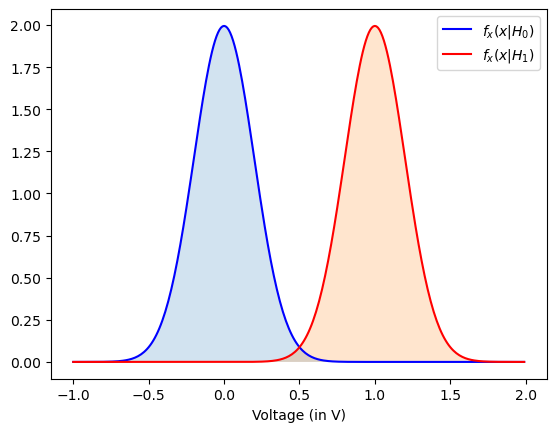

In [19]:
# plot the 
plt.plot(x, y0, color='blue', label='$f_x(x | H_0)$')
# this fills in the color of the plot
plt.fill_between(x, y0, interpolate=True,alpha=0.2)

plt.plot(x,y1,color='red', label='$f_x(x | H_1)$')
# this fills in the color of the plot
plt.fill_between(x,y1,interpolate=True,alpha=0.2)

plt.xlabel('Voltage (in V)')

plt.legend()

### Receiver-Operator Curves (ROC)
To plot the _receiver-operator curve (ROC)_ of the alarm system, we need to simulate measurements and test different decision thresholds.

In [20]:
signal_present = np.random.rand(1000) > .5
signal = np.random.normal(mu0, sigma, size=signal_present.size)
signal[signal_present] = np.random.normal(2, 1, size=signal_present.sum())

import pandas as pd
df=pd.DataFrame({"trial": range(len(signal)), "signal_present": signal_present, "signal": signal})
df['response'] = df.signal > .5
df.head()

,trial,signal_present,signal,response
0,0,True,2.548072,True
1,1,False,-0.087440,False
2,2,False,-0.159525,False
3,3,False,-0.150098,False
4,4,False,-0.126855,False


In [21]:
hit = df.response[df.signal_present]
miss = ~df.response[df.signal_present]
fa = df.response[~df.signal_present]
cr = ~df.response[~df.signal_present]

print("Hit rate: {:.2f}".format(hit.mean()))
print("Miss rate: {:.2f}".format(miss.mean()))
print("False alarm rate: {:.2f}".format(fa.mean()))
print("Correct rejection rate: {:.2f}".format(cr.mean()))

Hit rate: 0.91
Miss rate: 0.09
False alarm rate: 0.00
Correct rejection rate: 1.00


In [22]:
from scipy import stats
dprime = stats.norm.ppf(hit.mean()) - stats.norm.ppf(fa.mean())
print("d prime: {:.2f}".format(dprime))

df['response'] = signal > 0.2

hit = df.response[df.signal_present]
fa = df.response[~df.signal_present]
dprime = stats.norm.ppf(hit.mean()) - stats.norm.ppf(fa.mean())
print("d prime: {:.2f}".format(dprime))

d prime: 4.01
d prime: 2.51


In [23]:
c = -(stats.norm.ppf(hit.mean()) + stats.norm.ppf(fa.mean()))/2.0
print("c: {:.2f}".format(c))

c: -0.38


In [24]:
N = 10000
# signal = np.random.normal(mu0, sigma, n)
# noise = np.random.normal(mu1, sigma, n)
# signal = np.random.normal(mu0, sigma, n)
# noise = np.random.normal(mu1, sigma, n)
# y0 = f_x(x, mu0, sigma)
# y1 = f_x(x, mu1, sigma)

x0 = norm.rvs(mu0, sigma, N//2)
x1 = norm.rvs(mu1, sigma, N//2)

# adding some extra measurement noise?
# x0 += norm.rvs(0, .25, len(x0))
# x1 += norm.rvs(0, .25, len(x1))

print("Signal mean +/- std: {:.2f} ({:.2f})".format(x0.mean(), x0.std()))
print("Noise mean +/- std: {:.2f} ({:.2f})".format(x1.mean(), x1.std()))

Signal mean +/- std: 0.01 (0.20)
Noise mean +/- std: 1.00 (0.20)


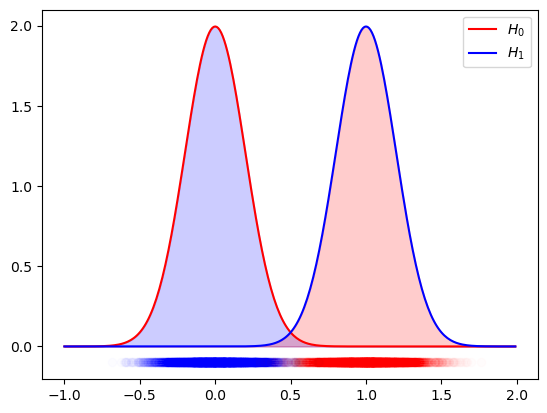

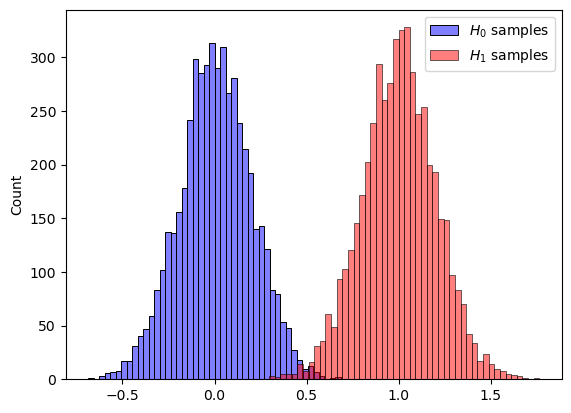

In [25]:
# plot the 
plt.plot(x, y0, color='red', label='$H_0$')
# this fills in the color of the plot
plt.fill_between(x, y0, interpolate=True, color='blue', alpha=0.2)

plt.plot(x, y1, color='blue', label='$H_1$')
# this fills in the color of the plot
plt.fill_between(x, y1,interpolate=True, color='red', alpha=0.2)

plt.plot(x0, -.1*np.ones(len(x0)), 'o', color='blue', alpha=np.sqrt(1./N))
plt.plot(x1, -.1*np.ones(len(x1)), 'o', color='red', alpha=np.sqrt(1./N))
plt.legend()

plt.figure()
import seaborn as sns
sns.histplot(x0, color="blue", alpha=.5, label="$H_0$ samples")
sns.histplot(x1, color="red", alpha=.5, label="$H_1$ samples")
plt.legend()

The ROC visualizes the trade-off between having small false-alarm rates _vs._ high hit rates. The optimal case would result in a perfectly sharp rectangle corner curve.

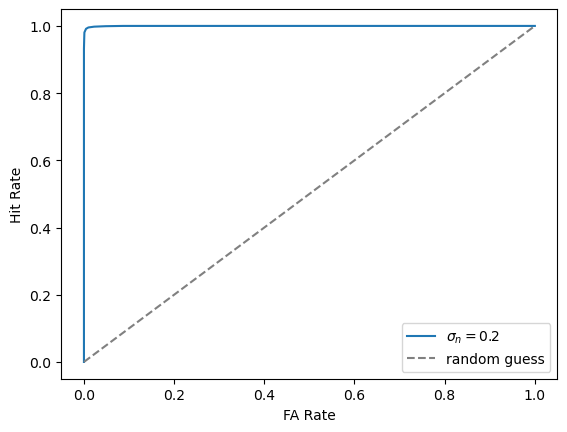

In [26]:
criterions = np.linspace(-3, 3, 100)

hit_rates = [(x1 > c).mean() for c in criterions]
fa_rates = [(x0 > c).mean() for c in criterions]

# remember ROCs for different sigmas
if 'ROC' not in vars(): ROC = dict()
ROC[sigma] = (hit_rates, fa_rates)

for s, (h, f) in sorted(ROC.items()):
    plt.plot(f, h, label=f"$\sigma_n={s}$")
plt.plot([0, 1], [0, 1], ls="--", c=".5", label='random guess')
plt.gca().set(xlabel="FA Rate", ylabel="Hit Rate")
plt.legend()

### Influence of (process or measurement) noise
If you jump [back](#Detection) to where we defined the distribution parameters and change the noise standard deviation $\sigma_n$, multiple ROCs will be plotted against each other when you re-run the code.

### Optimal Thresholds
If we assuming equal prior probabilities, we can choose an optimum threshold using the Bayesian decision rule, i.e., we want to decide for $H_1$ if the log-ratio
$$
  \Lambda(x) = \frac{f_x(x | H_1)}{f_x(x | H_0)} > 1
$$
    
$$
\begin{align*}
  && \Delta(x^*) &= 1 \\
  \Leftrightarrow  && 
  \frac{1}{\sqrt{2 \pi \sigma_n^2}} \cdot \exp \left( -\frac{(x^* - \mu_1)^2}{2\sigma_n^2} \right) &=
  \frac{1}{\sqrt{2 \pi \sigma_n^2}} \cdot \exp \left( -\frac{(x^* - \mu_0)^2}{2\sigma_n^2} \right) \\
  \Leftrightarrow  && 
  \left( x^* - \mu_1 \right)^2 &= \left( x^* - \mu_0 \right)^2 \\
  \Leftrightarrow  && 
  {x^*}^2 - 2\mu_1 x^* + \mu_1^2 &= {x^*}^2 - 2\mu_0 x^* + \mu_0^2 \\
  \Leftrightarrow  && 
  2x^* \left( \mu_0 - \mu_1 \right) &= \mu_0^2 - \mu_1^2 \\
  \Leftrightarrow  && 
  x^* &= \frac{\mu_0 + \mu_1}{2}
\end{align*}
$$

In [27]:
# print(rf'$x^* = {(\mu_0 + \mu_1)/2.}$')
display(Latex(f'Given our current distribution parameters, this gives us the optimal threshold of $x^* = {(mu0 + mu1)/2.}$'))

<IPython.core.display.Latex object>

### Influence of Standard Deviation

As you see, this optimal threshold $x^*$ is independent from the standard deviation $\sigma_n$ when infered from the Bayesian decision rule. 

If you use the Neyman-Paerson test, you have to maximize $P_D$ considering that $P_F \leq \alpha$:
$$
\begin{align}
  \Lambda(x) &\stackrel{H_1}{>} \gamma &\text{with}&& P_f &= \int_{x, \Delta{x} > \gamma}\limits f_x(x | H_0) \,\mathrm{d}x = \alpha \quad .
\end{align}
$$
Apparently, this derivation now depends on the standard deviation, such that the threshold $x^*$ or the parameter $\alpha$ needs to be updated.

In [28]:
P0, P1 = 0.9, 0.1
C01, C10 = 2, 5

### Prior Probabilities

We can now introduce some prior probabilities for the events, i.e., $P_0 = P(H_0)$ and $P_1 = P(H_1)$ for the cases that nothing happens or an object needs to be removed, respectively. We initially set these probabilities to $P_0=0.9$ and $P_1=0.1$.

In [29]:
display(Latex(f'From that, we define $C_{{01}}={C01}$ and $C_{{10}}={C10}$ for false alarms and missed hits, respectively. Correct classifications should not incur any costs, i.e., $C_{{00}} = C_{{11}} = 0$.'))

<IPython.core.display.Latex object>

With that, we can now infer a new appropriate threshold that minimized these accumulated costs:

$$
\begin{align*}
  &&
  \Lambda(x) = \frac{f_x(x | H_1)}{f_x(x | H_0)} &\stackrel{H_1}{>} \frac{C_{01} - C_{00}}{C_{10} - C_{11}} \cdot \frac{P_0}{P_1} \\
  \Leftrightarrow  && 
  C_{01} P_0 f_x(x | H_0) &= C_{10} P_1 f_x(x | H_1) \\
  \Leftrightarrow  && 
  C_{01} P_0 f_x(x | H_0) \frac{1}{\sqrt{2 \pi \sigma_n^2}} \cdot \exp \left( -\frac{(x^* - \mu_1)^2}{2\sigma_n^2} \right)
  &= 
  C_{10} P_1 f_x(x | H_1) \frac{1}{\sqrt{2 \pi \sigma_n^2}} \cdot \exp \left( -\frac{(x^* - \mu_1)^2}{2\sigma_n^2} \right) \\
  \Leftrightarrow  && 
  -\frac{(x^* - \mu_0)^2}{2\sigma_n^2} + \frac{(x^* - \mu_1)^2}{2\sigma_n^2} &=
  \ln \left( C_{10} P_1 \right) - \ln \left( C_{01} P_0 \right) \\
  \Leftrightarrow  && 
  -\left( {x^*}^2 -2 x^* \mu_0 + \mu_0^2 \right) + -\left( {x^*}^2 -2 x^* \mu_1 + \mu_1^2 \right) &= 2\sigma_n^2 \left( \ln \left( C_{10} P_1 \right) - \ln \left( C_{01} P_0 \right) \right) \\
  \Leftrightarrow  && 
  2x^* \left( \mu_0 - \mu_1 \right) &= 2\sigma_n^2 \left( \ln \left( C_{10} P_1 \right) - \ln \left( C_{01} P_0 \right) \right) + \left( \mu_0^2 - \mu_1^2 \right) \\
  \Leftrightarrow  && 
  x^* &= \frac{2\sigma_n^2 \left( \ln \left( C_{10} P_1 \right) - \ln \left( C_{01} P_0 \right) \right)}{\mu_0 - \mu_1} + \frac{\mu_0 + \mu_1}{2}
\end{align*}
$$

In [30]:
x_ = sigma**2 * (np.log(C01 * P1) - np.log(C10 * P0))/(mu0 - mu1) + (mu0 + mu1)/2.
display(Latex(f'Given our current model parameters and costs, this gives us the optimal threshold of $x^* = {x_:0.2f}$'))

<IPython.core.display.Latex object>

In [31]:
display(Latex(f'Given our current model parameters and costs, this gives us the optimal threshold of '))
for s in sorted(ROC.keys()): 
    x_ = s**2 * (np.log(C10 * P1) - np.log(C01 * P0))/(mu0 - mu1) + (mu0 + mu1)/2.
    display(Latex(f'$x^*_{{\sigma_n={s}}} = {x_:0.2f}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>